In [1]:
from sklearn.linear_model import Lasso

from model_utils import load_dataset, run_experiment, print_results, plot_residuals

C:\Users\drawi\anaconda3\envs\fall22\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset()

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [01:15<00:00,  3.30s/it]


In [3]:
for test_score in ['sat_math', 'sat_ebrw']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)
    
for test_score in ['math_4', 'math_8', 'reading_4', 'reading_8']:
    dataset['testscores;{}_delta'.format(test_score)] = \
        dataset.apply(lambda r: r['testscores;{}_2022'.format(test_score)] - r['testscores;{}_2019'.format(test_score)],
                      axis=1)

<a id='models'></a>

# LASSO REGRESSION MODELS

Average the entire year of data for each district. Same model is used for all states.

This yields only ~173 rows, so we use k-fold Cross Validation to measure model performance. _Note that the folds are constructed to ensure that all data from a given state is in either the test or train split._

Unless otherwise noted, all models use engagement data (split by product type), locale type data, and broadband data, but not the socioeconomic data (due to missing data issues that would reduce the size of the dataset).

### 4th and 8th Grade Test Score (& Change) Models

Each baseline trains 4 lasso regression models (default sklearn parameters), one for each combination of 4th & 8th grade, math & reading test scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Model 1a___: Predict raw test scores. ([Model](#model1a_model) / [Results](#model1a_results))
- ___Model 1b___: Predict change in test scores. ([Model](#model1b_model) / [Results](#model1b_results))
- ___Model 2a___: Predict raw test scores from locale data only (i.e., data used by best baseline model). ([Model](#model2a_model) / [Results](#model2a_results))
- ___Model 2b___: Predict change in test scores from engagement and locale data only (i.e., data used by best baseline models). ([Model](#model2b_model) / [Results](#model2b_results))

### SAT Score (& Change) Models

Each baseline trains 2 lasso regression models (default sklearn parameters), one for math and one for reading SAT scores, using 5-fold cross-validation. The target variable is either the raw 2022 test scores or the magnitude of the change in test scores from 2019 to 2022, i.e., $score_{2022} - score_{2019}$. 

- ___Model 1c___: Predict raw test scores. ([Model](#model1c_model) / [Results](#model1c_results))
- ___Model 1d___: Predict change in test scores. ([Model](#model1d_model) / [Results](#model1d_results))
- ___Model 2c___: Predict raw test scores from engagement data only (i.e., data used by best baseline model). ([Model](#model2c_model) / [Results](#model2c_results))
- ___Model 2d___: Predict change in test scores from broadband data only (i.e., data used by best baseline model). ([Model](#model2d_model) / [Results](#model2d_results))

<a id='model1a_model'></a>

## Model 1a: Predict 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [4]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_2022', 
           'testscores;math_8_2022', 
           'testscores;reading_4_2022', 
           'testscores;reading_8_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;math_4_2022 has 174 samples after filtering
Dataset for testscores;math_8_2022 has 173 samples after filtering
Dataset for testscores;reading_4_2022 has 174 samples after filtering
Dataset for testscores;reading_8_2022 has 173 samples after filtering


<a id='model1a_results'></a>

### Model 1a Testing Results

[(Back to top)](#models)

In [5]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_2022
test_r2,0.2370
test_root_mean_squared_error,5.7529


testscores;math_4_2022: 5.7529


,testscores;math_8_2022
test_r2,0.1089
test_root_mean_squared_error,5.8737


testscores;math_8_2022: 5.8737


,testscores;reading_4_2022
test_r2,0.0461
test_root_mean_squared_error,6.6182


testscores;reading_4_2022: 6.6182


,testscores;reading_8_2022
test_r2,-0.0307
test_root_mean_squared_error,5.0829


testscores;reading_8_2022: 5.0829


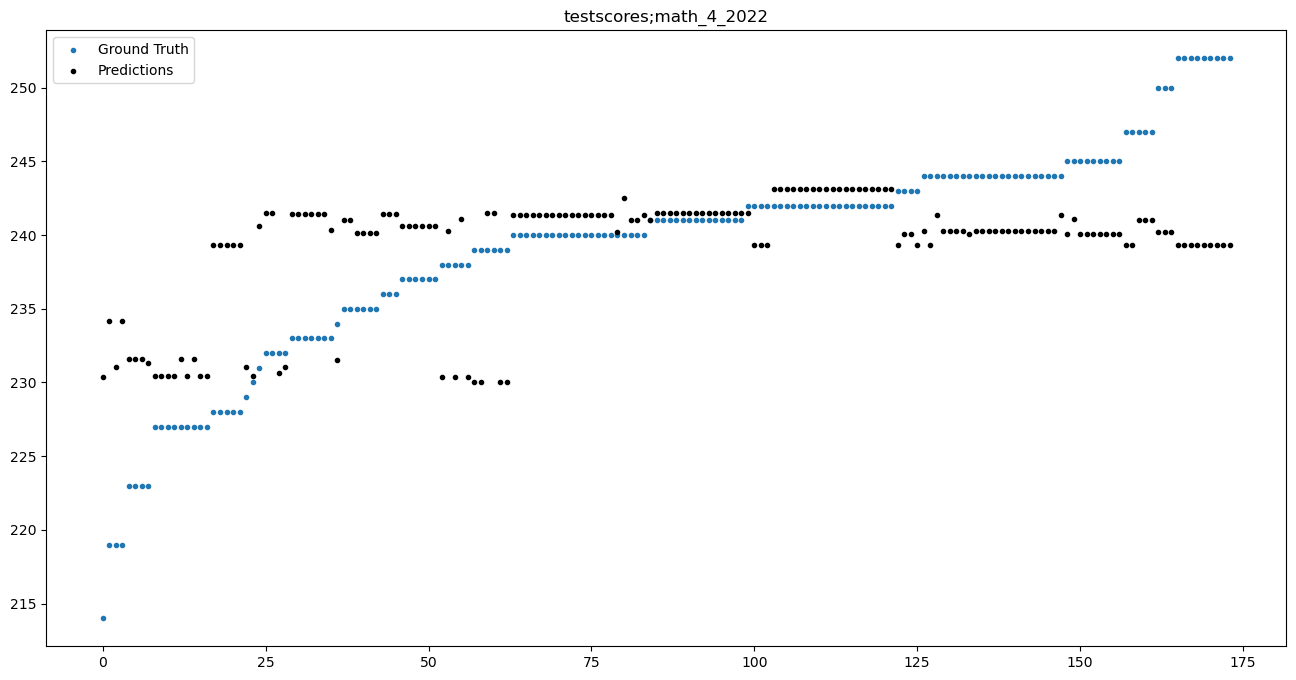

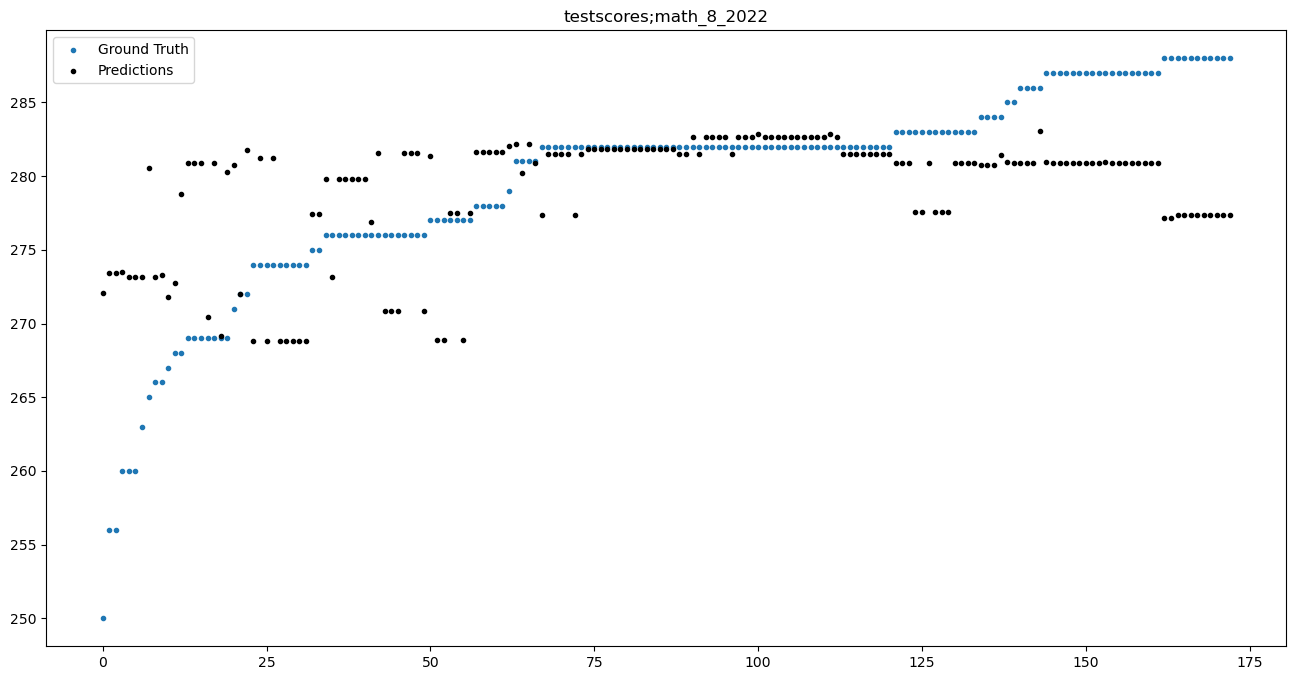

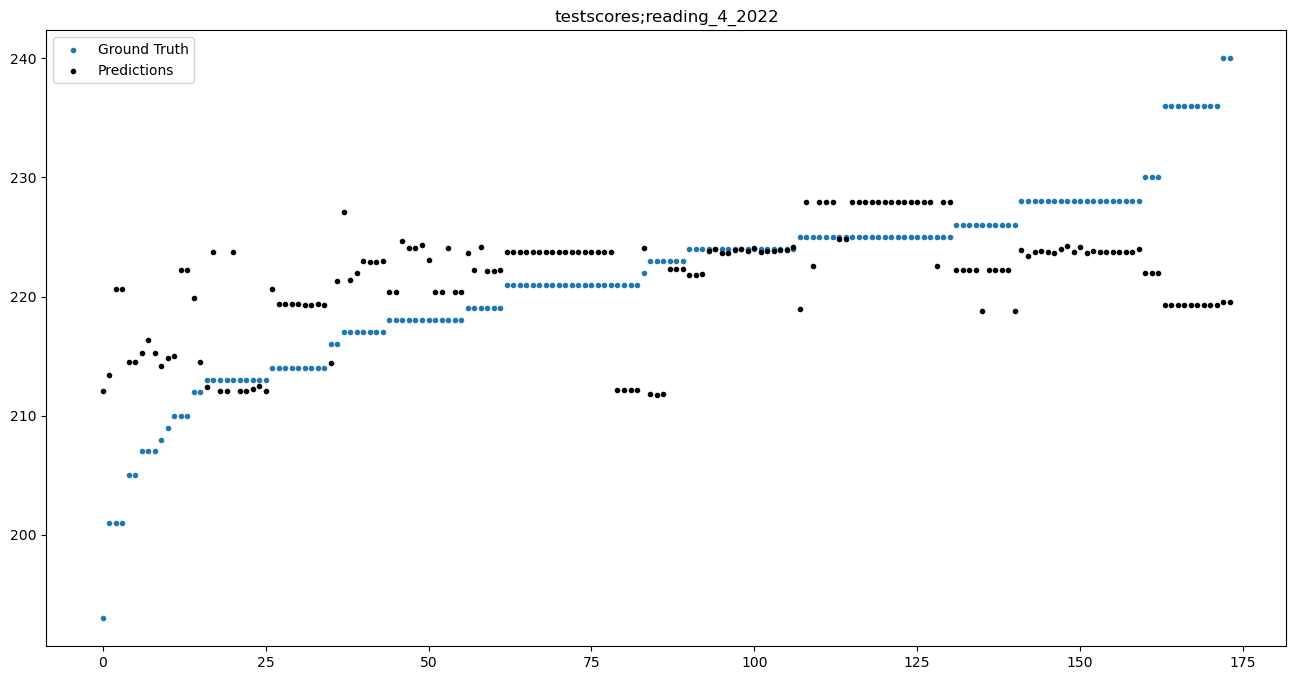

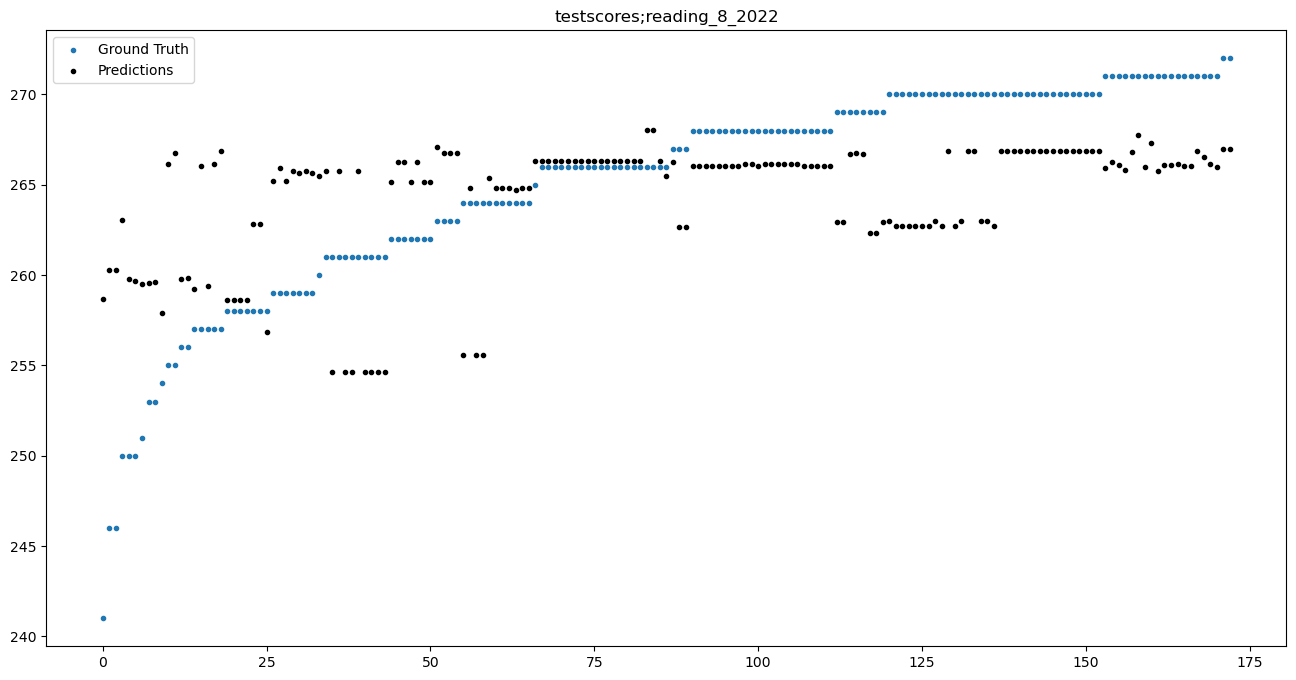

In [6]:
plot_residuals(five_fold_results)

<a id='model1b_model'></a>

## Model 1b: Predict Change In 8th and 4th Grade Test Scores from All Data

[(Back to top)](#models)

In [7]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


<a id='model1b_results'></a>

### Model 1b Testing Results

[(Back to top)](#models)

In [8]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-0.0043
test_root_mean_squared_error,3.6224


testscores;math_4_delta: 3.6224


,testscores;math_8_delta
test_r2,-0.7584
test_root_mean_squared_error,3.8617


testscores;math_8_delta: 3.8617


,testscores;reading_4_delta
test_r2,-0.1642
test_root_mean_squared_error,3.1262


testscores;reading_4_delta: 3.1262


,testscores;reading_8_delta
test_r2,-0.2799
test_root_mean_squared_error,3.6288


testscores;reading_8_delta: 3.6288


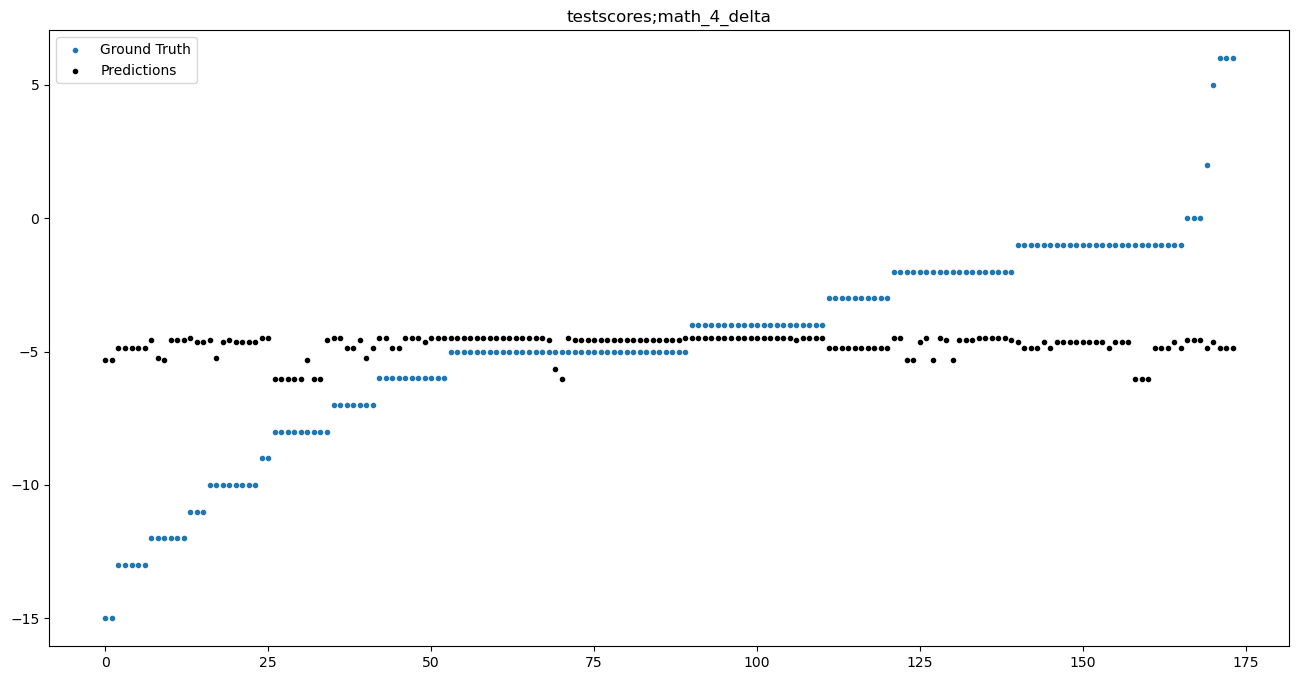

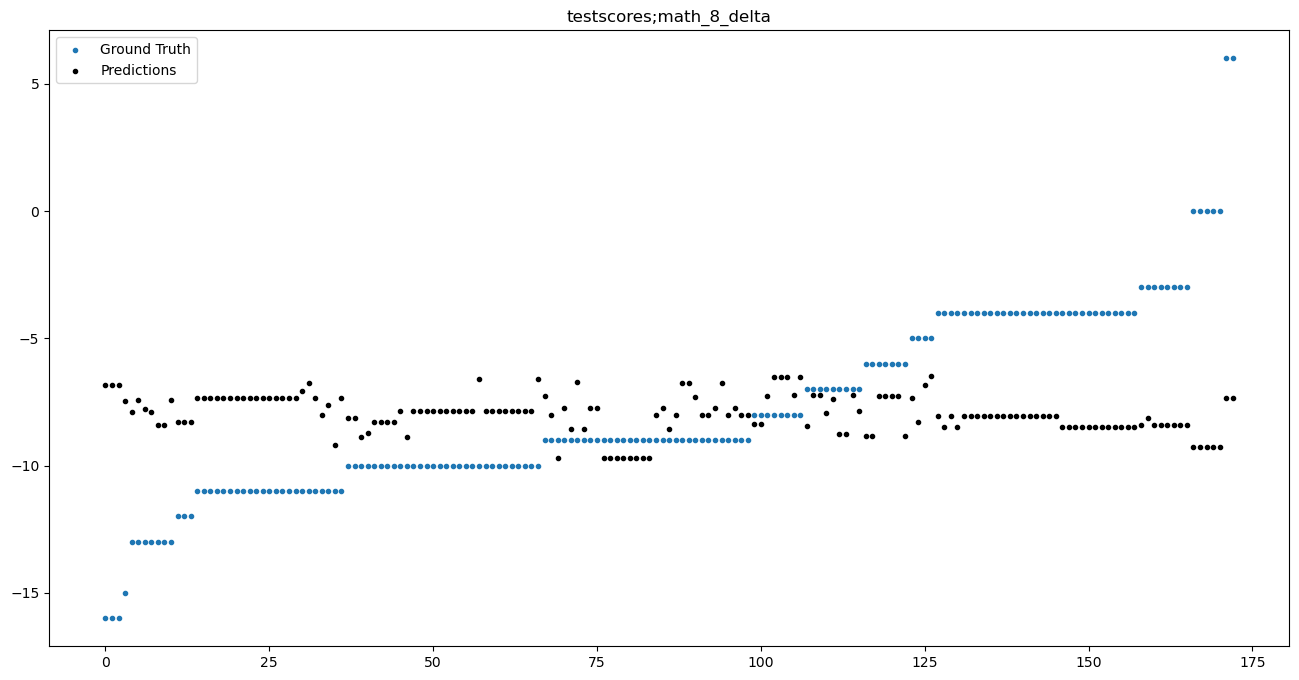

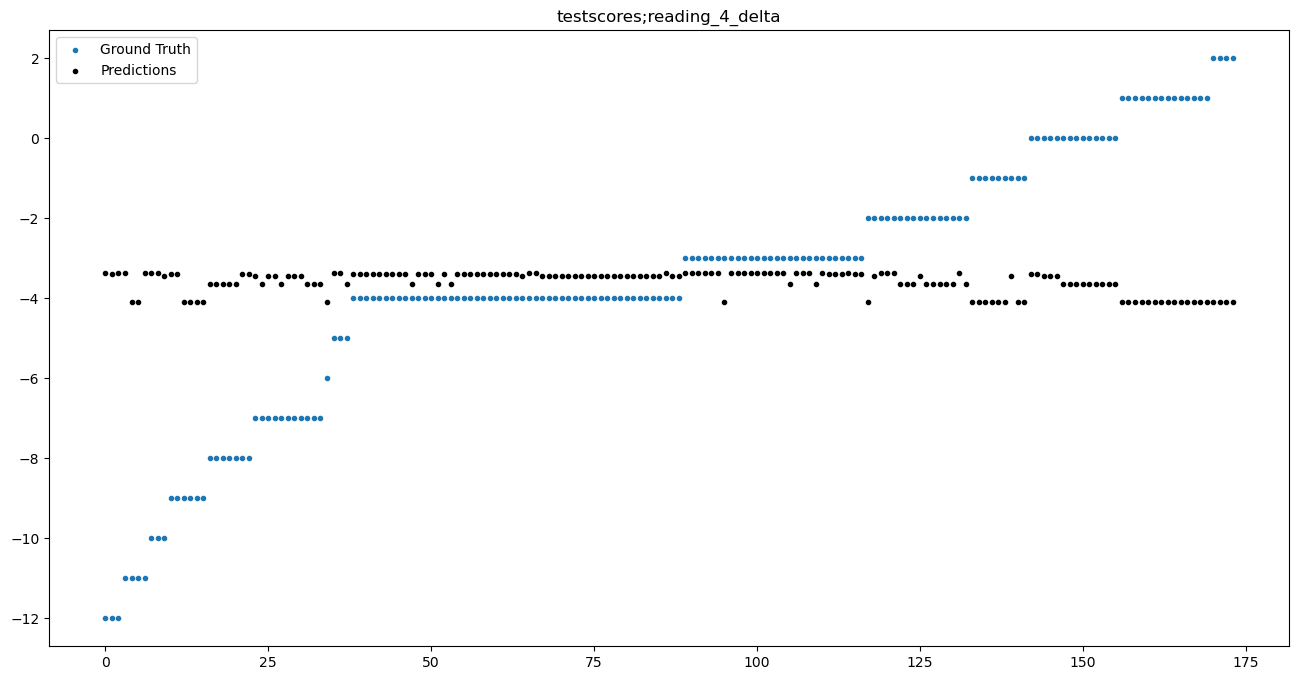

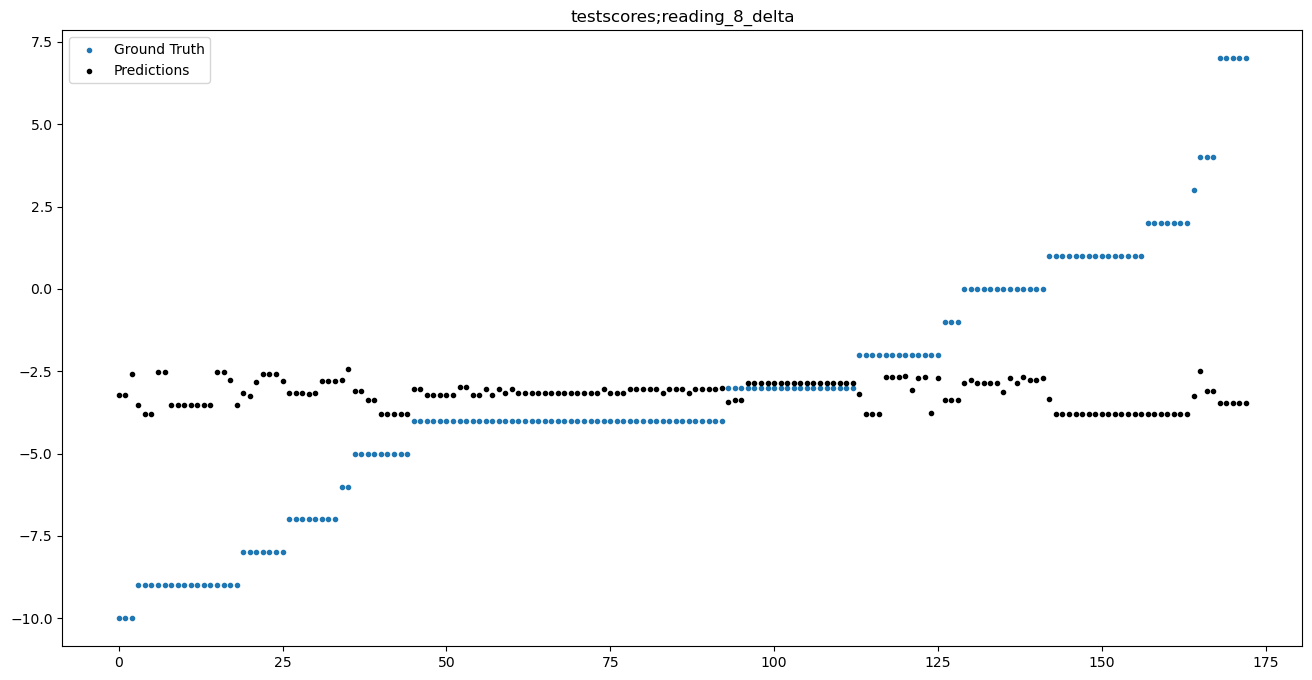

In [9]:
plot_residuals(five_fold_results)

<a id='model1c_model'></a>

## Model 1c: Predict SAT Scores from All Data

[(Back to top)](#models)

In [10]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_2022', 
           'testscores;sat_ebrw_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;sat_math_2022 has 176 samples after filtering
Dataset for testscores;sat_ebrw_2022 has 176 samples after filtering


<a id='model1c_results'></a>

### Model 1c Testing Results

[(Back to top)](#models)

In [11]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_2022
test_r2,-1.2458
test_root_mean_squared_error,48.9547


testscores;sat_math_2022: 48.9547


,testscores;sat_ebrw_2022
test_r2,-1.2519
test_root_mean_squared_error,45.9015


testscores;sat_ebrw_2022: 45.9015


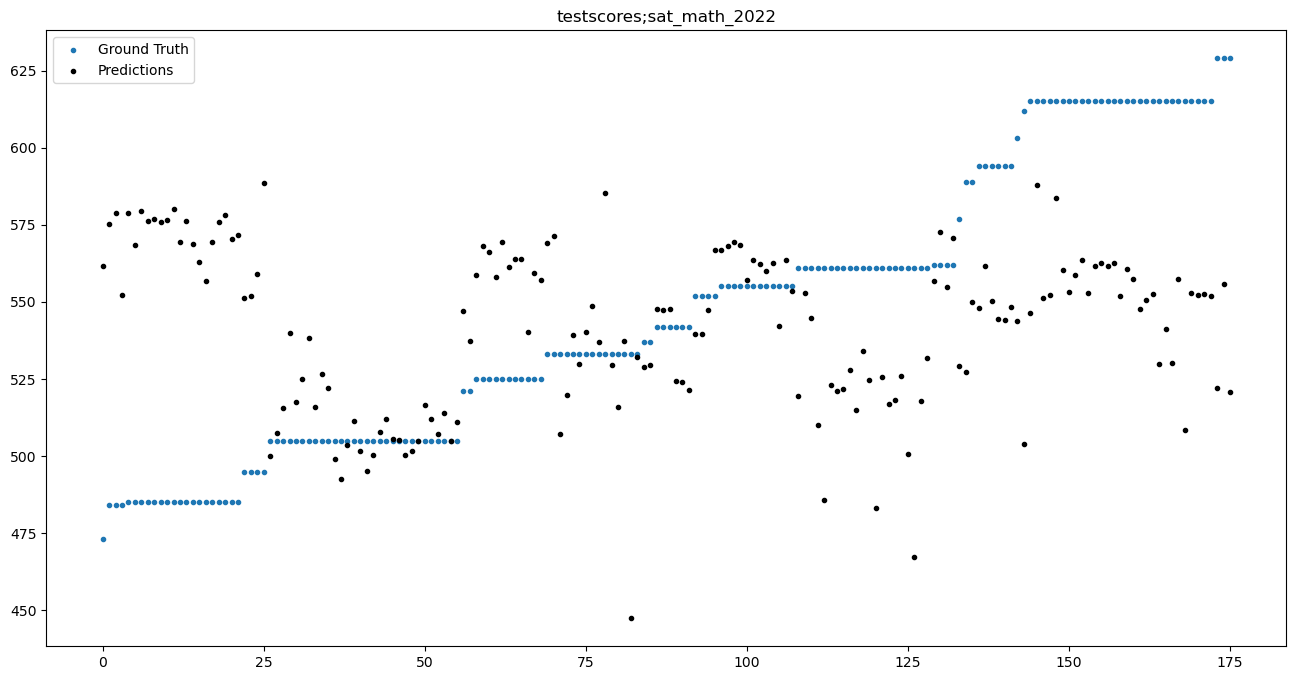

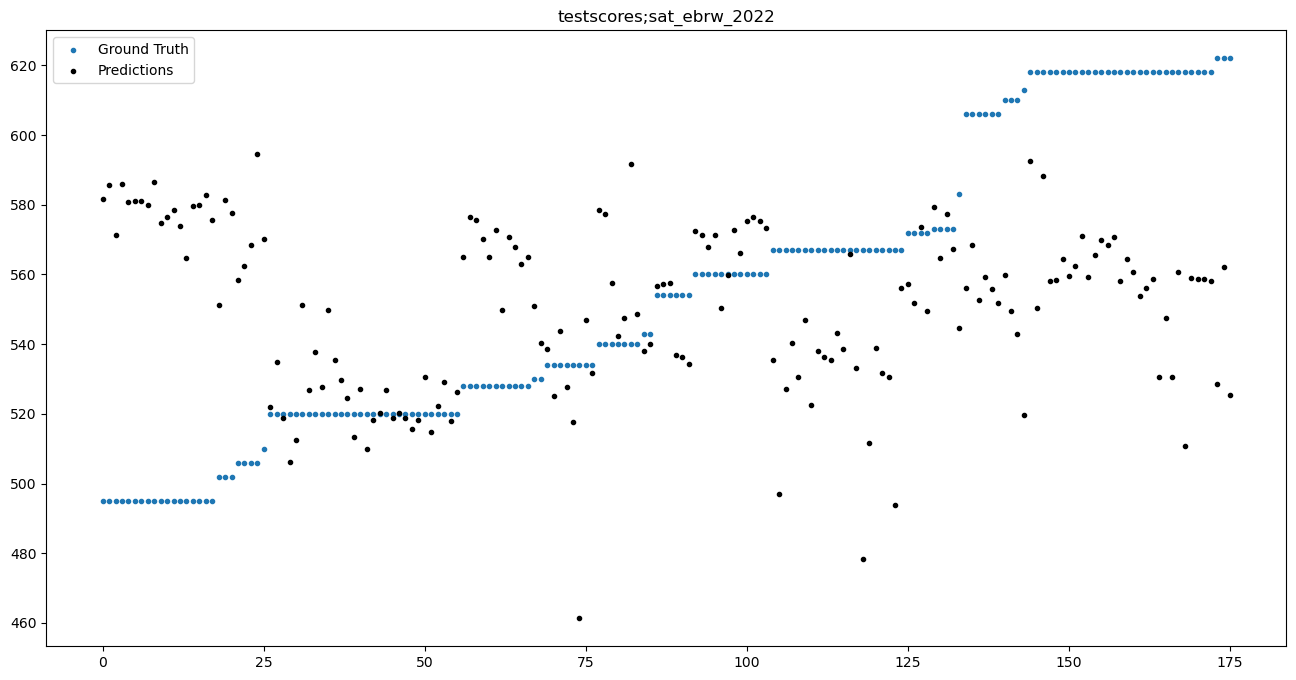

In [12]:
plot_residuals(five_fold_results)

<a id='model1d_model'></a>

## Model 1d: Predict SAT Score Change from All Data

[(Back to top)](#models)

In [13]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural',
            'broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


<a id='model1d_results'></a>

### Model 1d Testing Results

[(Back to top)](#models)

In [14]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.2503
test_root_mean_squared_error,12.2454


testscores;sat_math_delta: 12.2454


,testscores;sat_ebrw_delta
test_r2,-0.3102
test_root_mean_squared_error,12.7712


testscores;sat_ebrw_delta: 12.7712


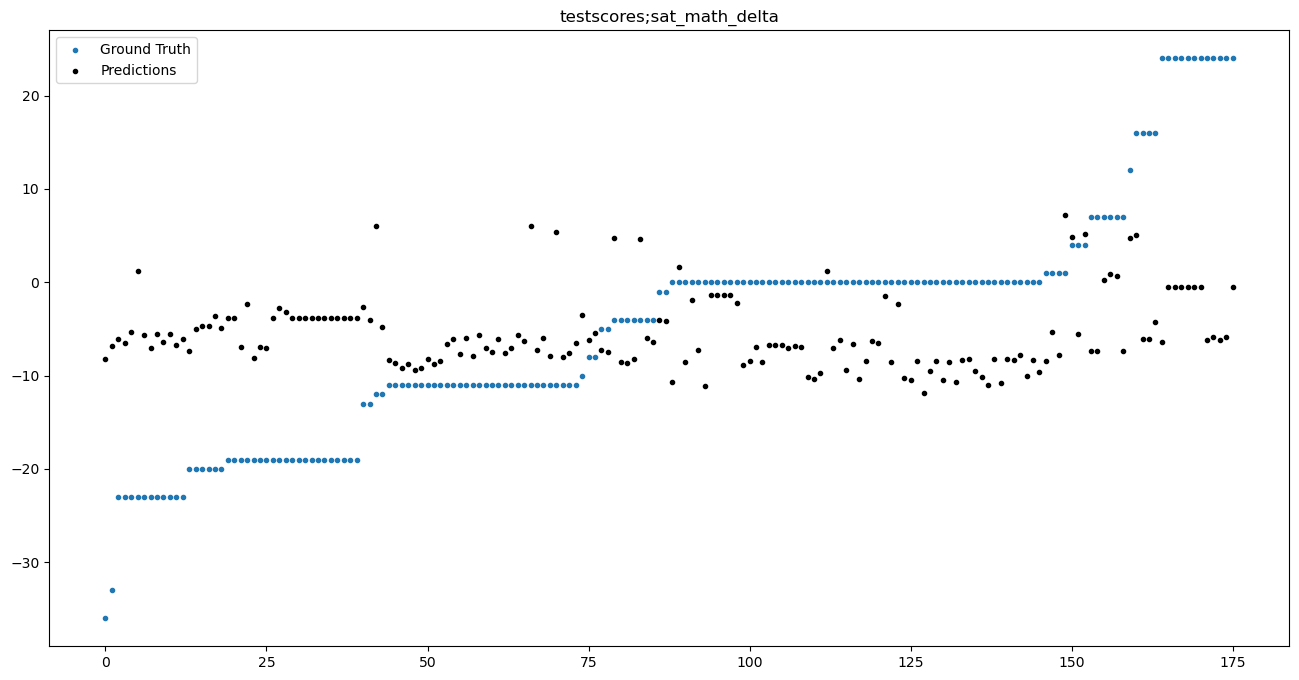

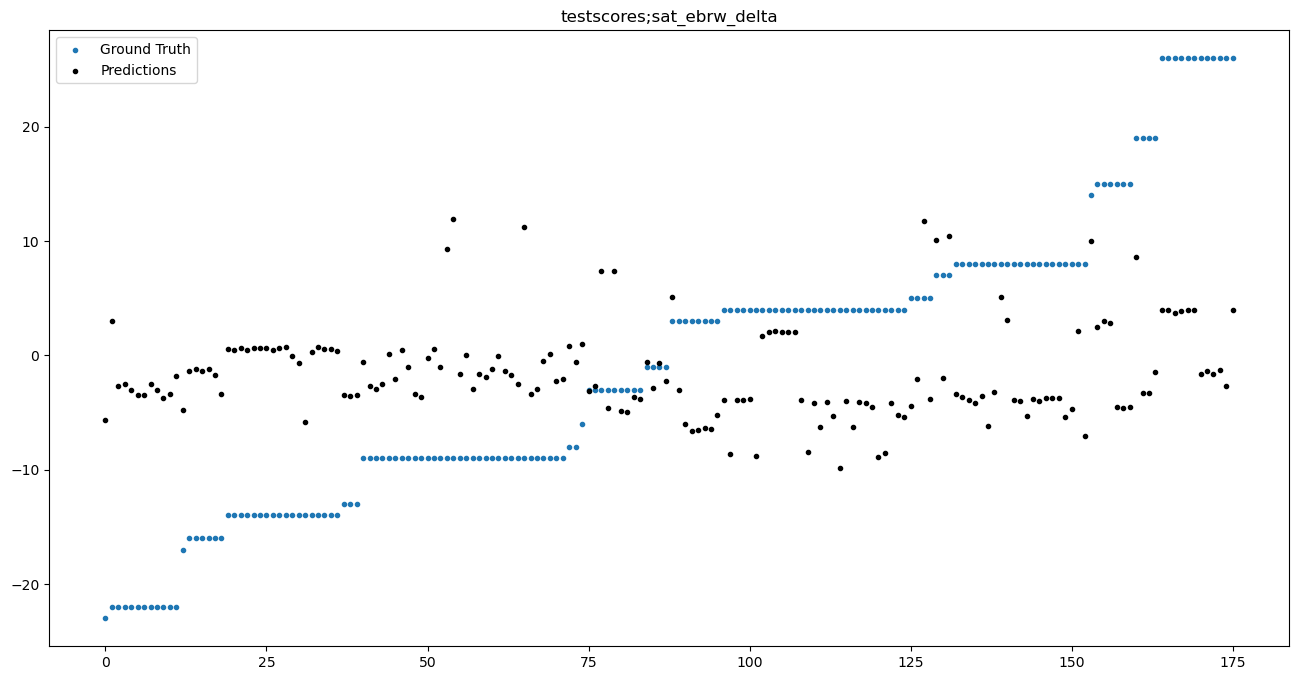

In [15]:
plot_residuals(five_fold_results)

<a id='model2a_model'></a>

## Model 2a: Predict 8th and 4th Grade Test Scores from Locale Type (Best Baseline) Data

[(Back to top)](#models)

In [16]:
FEATURES = ['districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

TARGETS = ['testscores;math_4_2022', 
           'testscores;math_8_2022', 
           'testscores;reading_4_2022', 
           'testscores;reading_8_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;math_4_2022 has 174 samples after filtering
Dataset for testscores;math_8_2022 has 173 samples after filtering
Dataset for testscores;reading_4_2022 has 174 samples after filtering
Dataset for testscores;reading_8_2022 has 173 samples after filtering


<a id='model2a_results'></a>

### Model 2a Testing Results

[(Back to top)](#models)

In [17]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_2022
test_r2,0.2562
test_root_mean_squared_error,5.6528


testscores;math_4_2022: 5.6528


,testscores;math_8_2022
test_r2,0.0969
test_root_mean_squared_error,5.8701


testscores;math_8_2022: 5.8701


,testscores;reading_4_2022
test_r2,0.0199
test_root_mean_squared_error,6.6725


testscores;reading_4_2022: 6.6725


,testscores;reading_8_2022
test_r2,-0.1255
test_root_mean_squared_error,5.2885


testscores;reading_8_2022: 5.2885


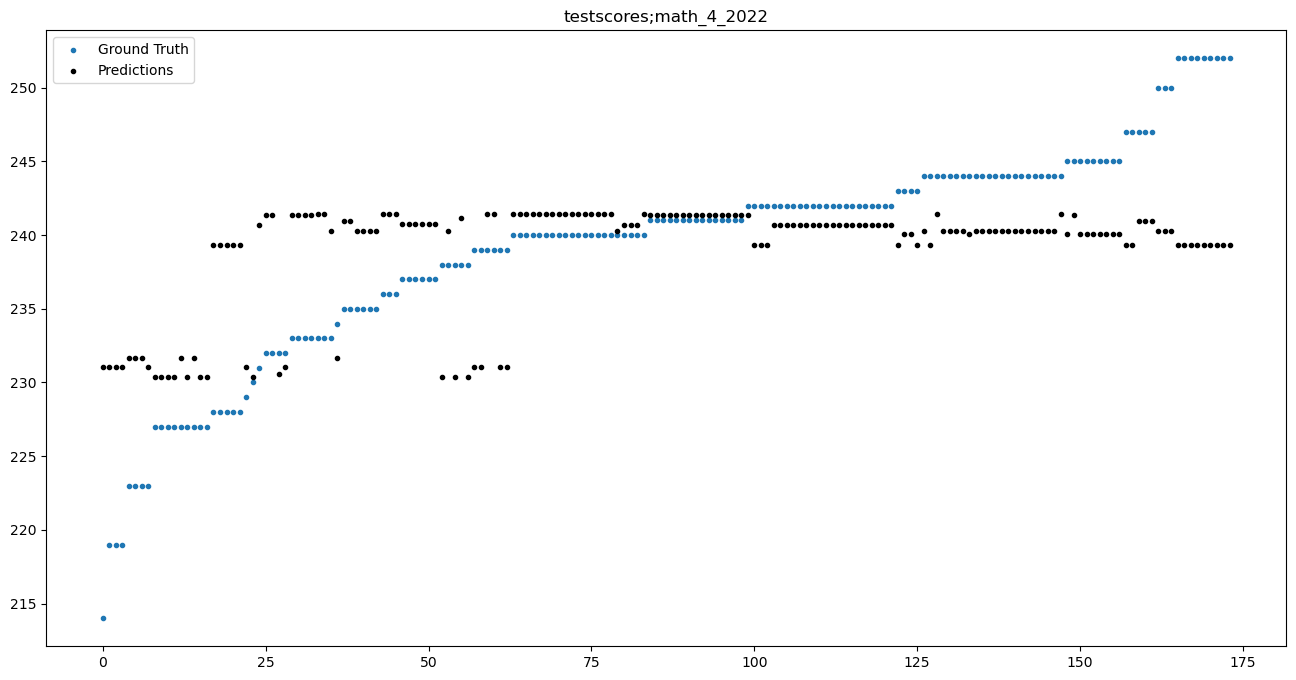

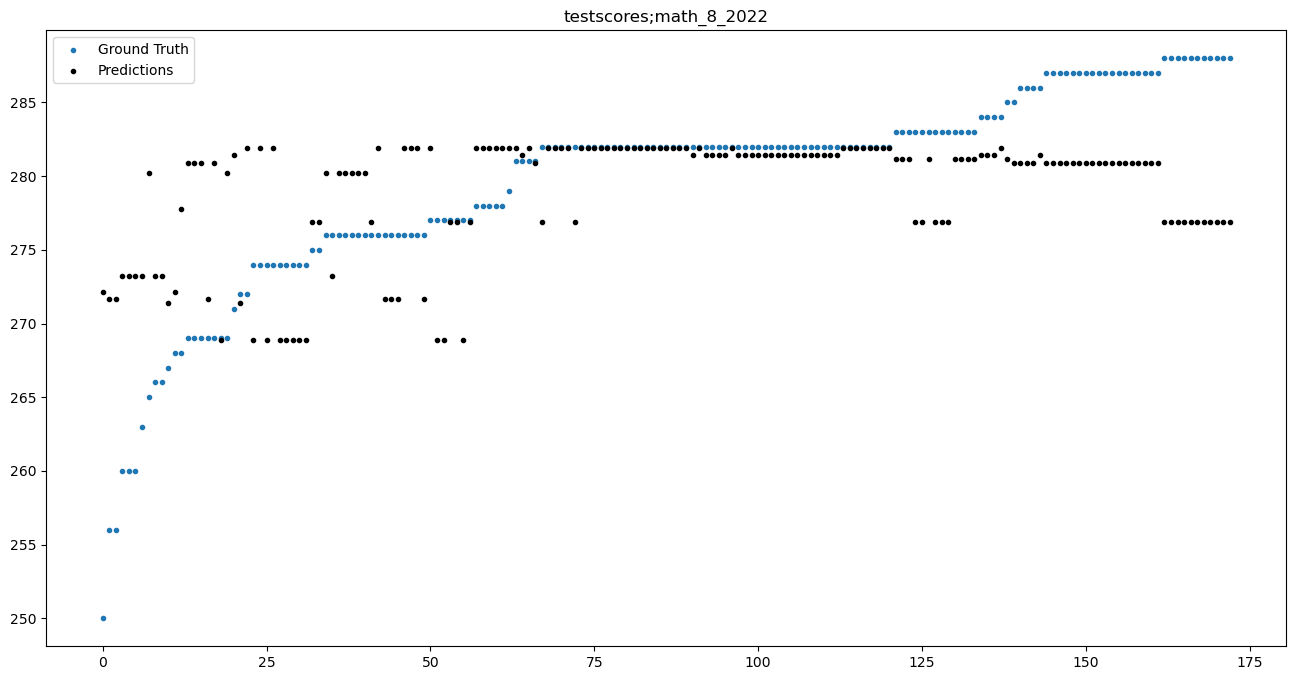

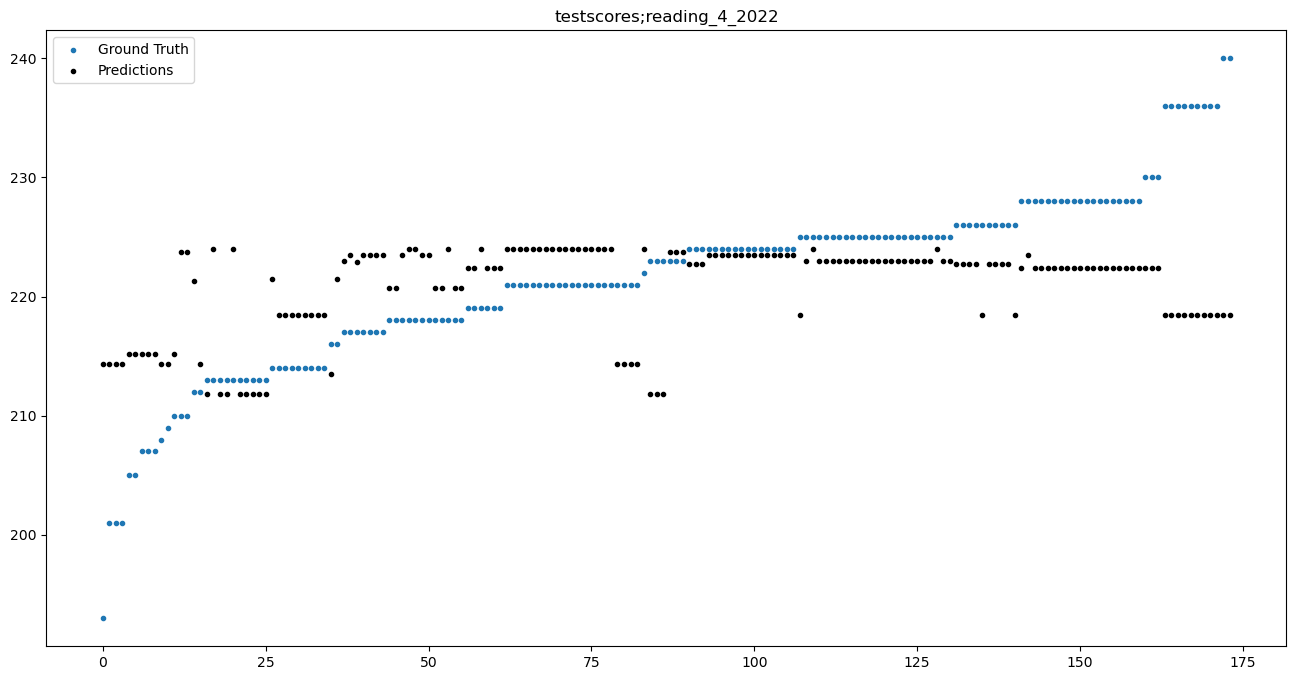

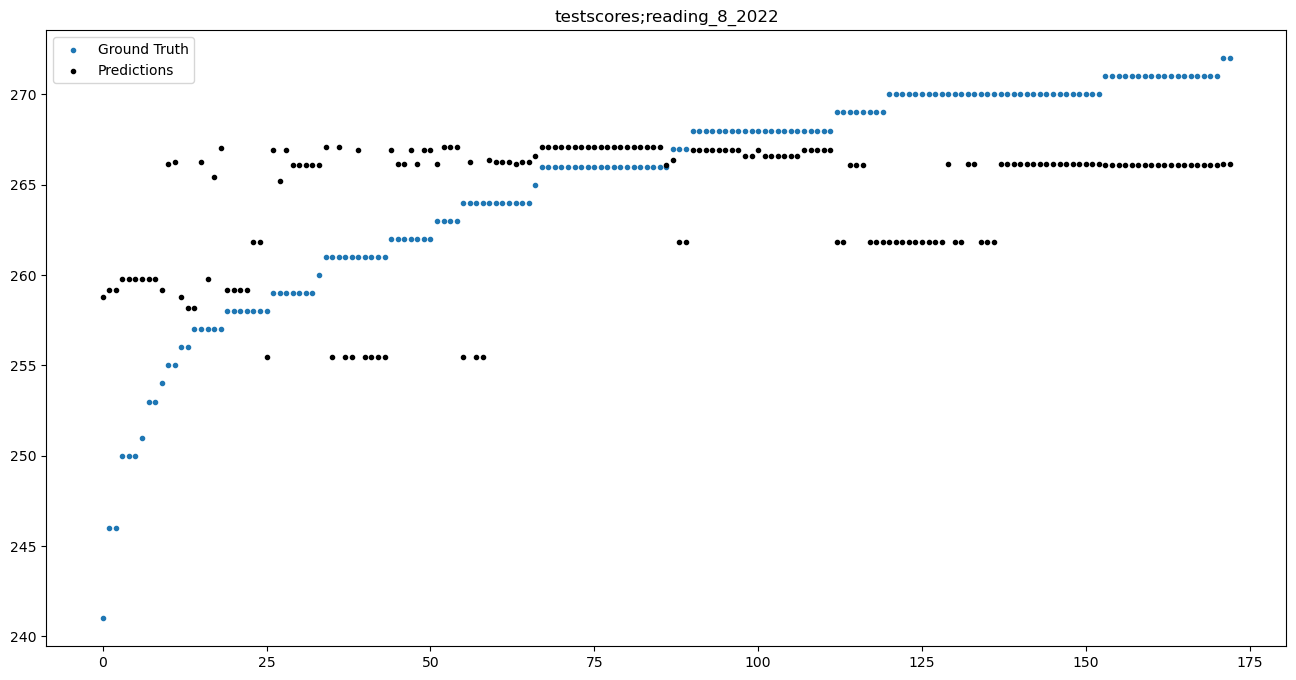

In [18]:
plot_residuals(five_fold_results)

<a id='model2b_model'></a>

## Model 2b: Predict Change In 8th and 4th Grade Test Scores from Engagement and Locale (Best Baseline) Data

[(Back to top)](#models)

In [19]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing',
            'districts;locale_city', 
            'districts;locale_suburb', 
            'districts;locale_town',
            'districts;locale_rural']

TARGETS = ['testscores;math_4_delta', 
           'testscores;math_8_delta', 
           'testscores;reading_4_delta', 
           'testscores;reading_8_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;math_4_delta has 174 samples after filtering
Dataset for testscores;math_8_delta has 173 samples after filtering
Dataset for testscores;reading_4_delta has 174 samples after filtering
Dataset for testscores;reading_8_delta has 173 samples after filtering


<a id='model2b_results'></a>

### Model 2b Testing Results

[(Back to top)](#models)

In [20]:
print_results(five_fold_results, splits=['test'])

,testscores;math_4_delta
test_r2,-0.0043
test_root_mean_squared_error,3.6224


testscores;math_4_delta: 3.6224


,testscores;math_8_delta
test_r2,-0.8118
test_root_mean_squared_error,3.8975


testscores;math_8_delta: 3.8975


,testscores;reading_4_delta
test_r2,-0.1642
test_root_mean_squared_error,3.1262


testscores;reading_4_delta: 3.1262


,testscores;reading_8_delta
test_r2,-0.2955
test_root_mean_squared_error,3.6517


testscores;reading_8_delta: 3.6517


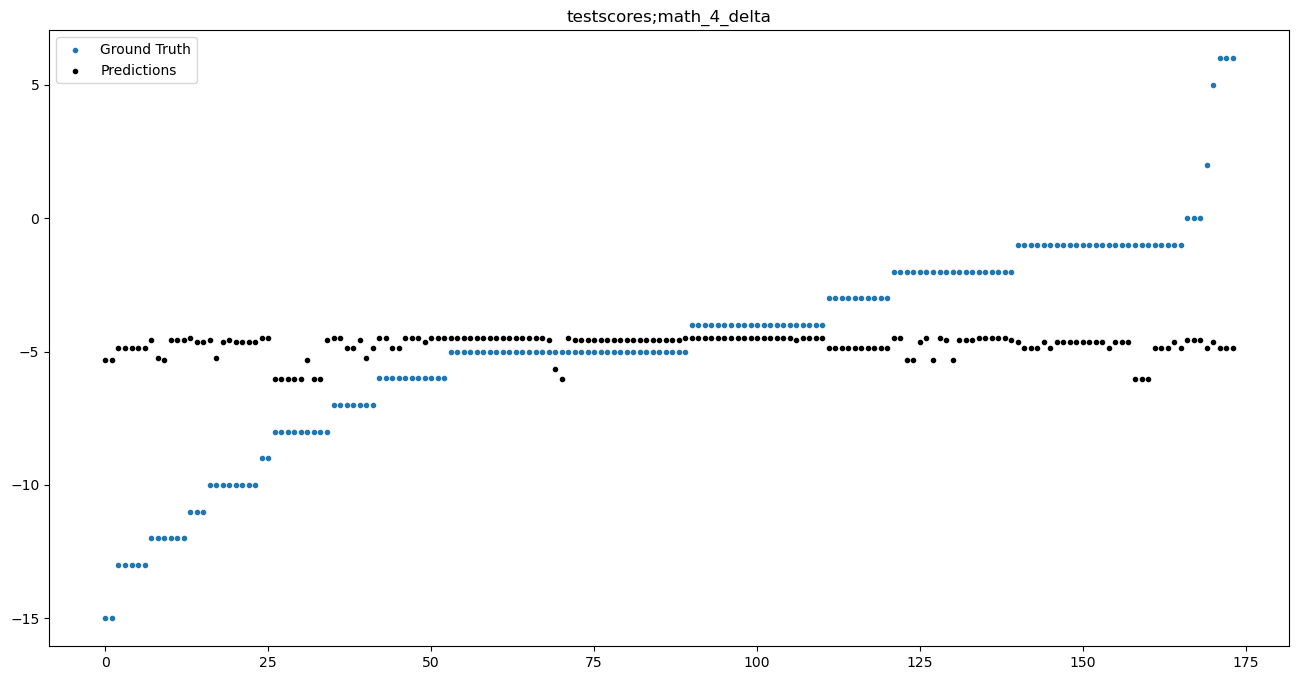

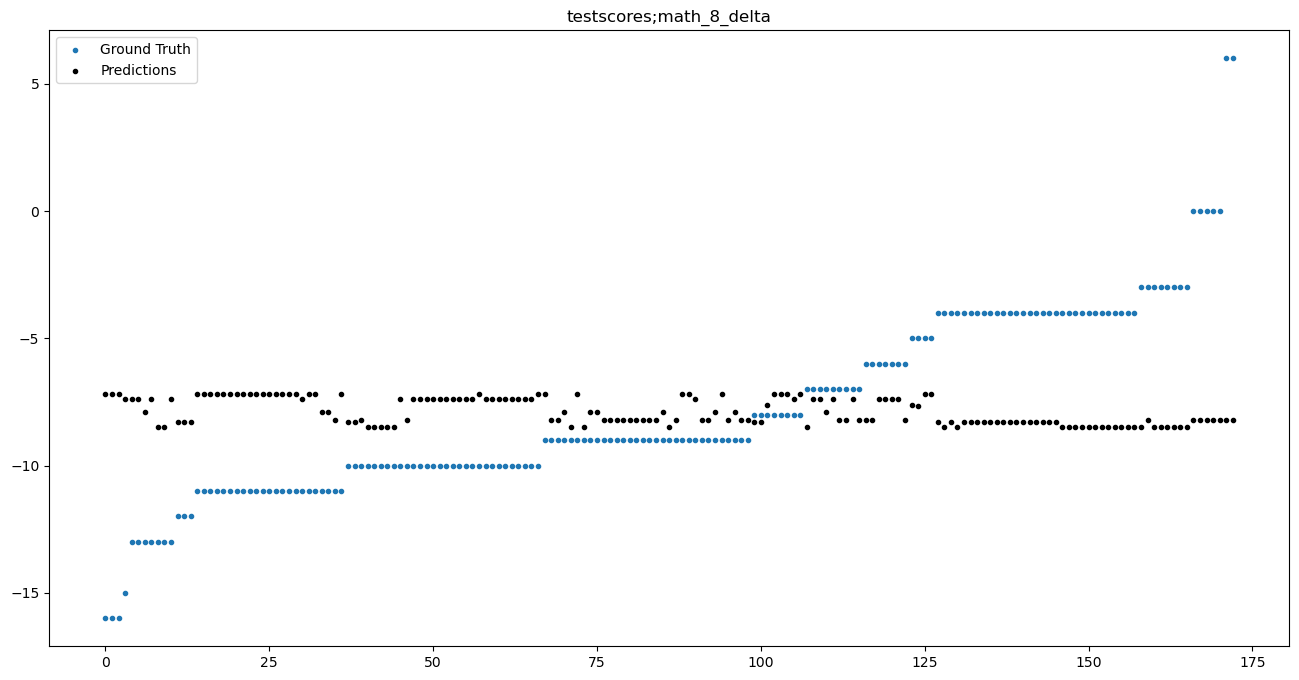

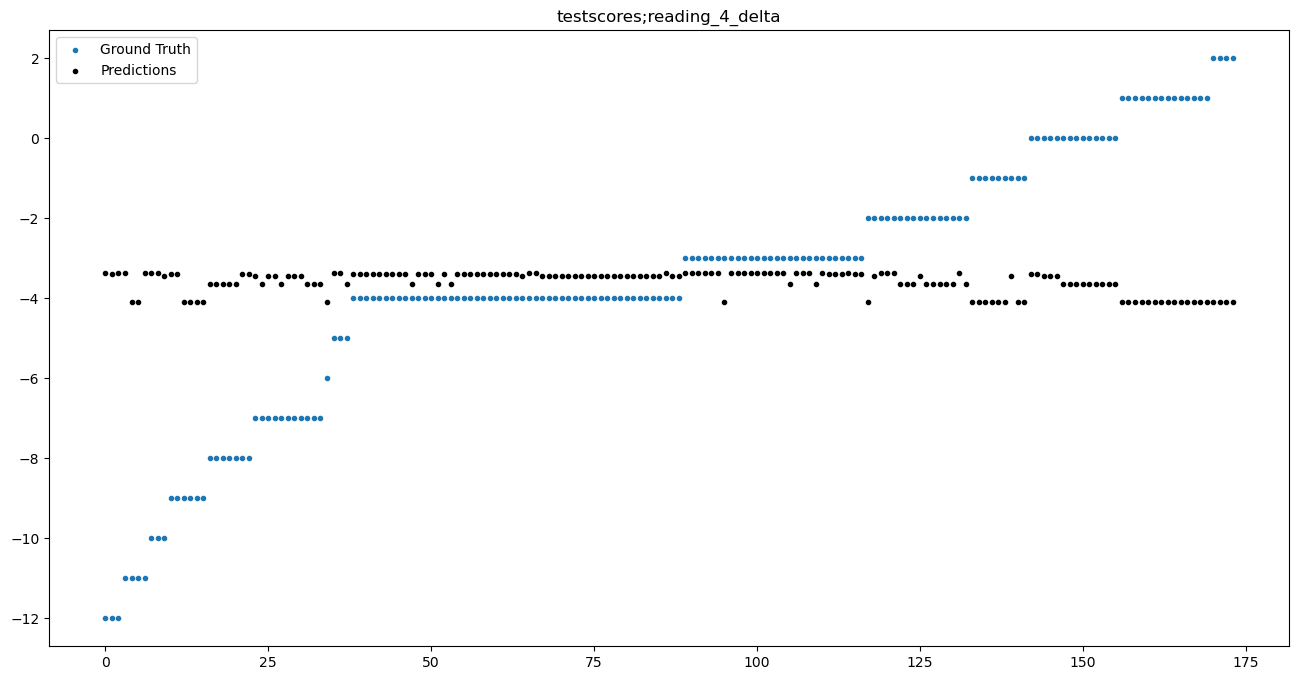

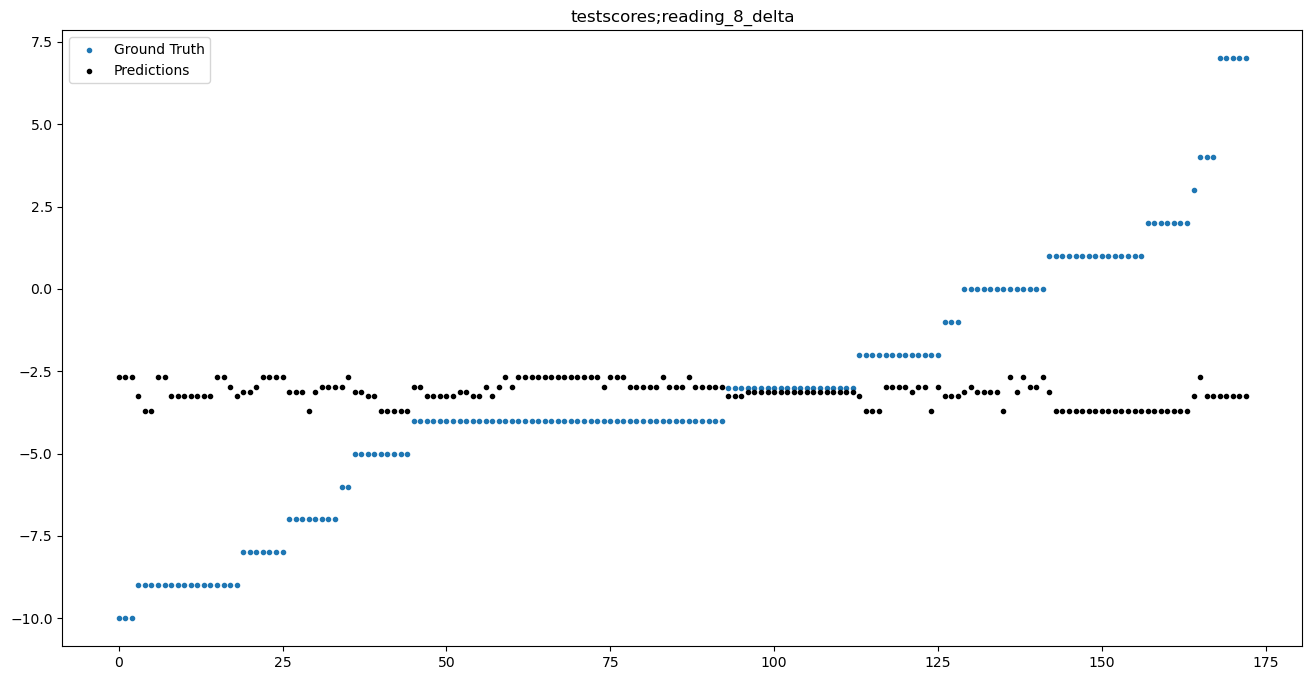

In [21]:
plot_residuals(five_fold_results)

<a id='model2c_model'></a>

## Model 2c: Predict SAT Scores from Engagement (Best Baseline) Data

[(Back to top)](#models)

In [22]:
FEATURES = ['engagement;avg_SDO',
            'engagement;avg_CM',
            'engagement;avg_LC', 
            'engagement;avg_LC_CM_SDO', 
            'engagement;avg_Missing']

TARGETS = ['testscores;sat_math_2022', 
           'testscores;sat_ebrw_2022']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;sat_math_2022 has 176 samples after filtering
Dataset for testscores;sat_ebrw_2022 has 176 samples after filtering


<a id='model2c_results'></a>

### Model 2c Testing Results

[(Back to top)](#models)

In [23]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_2022
test_r2,-1.2672
test_root_mean_squared_error,48.0320


testscores;sat_math_2022: 48.032


,testscores;sat_ebrw_2022
test_r2,-1.1822
test_root_mean_squared_error,43.9388


testscores;sat_ebrw_2022: 43.9388


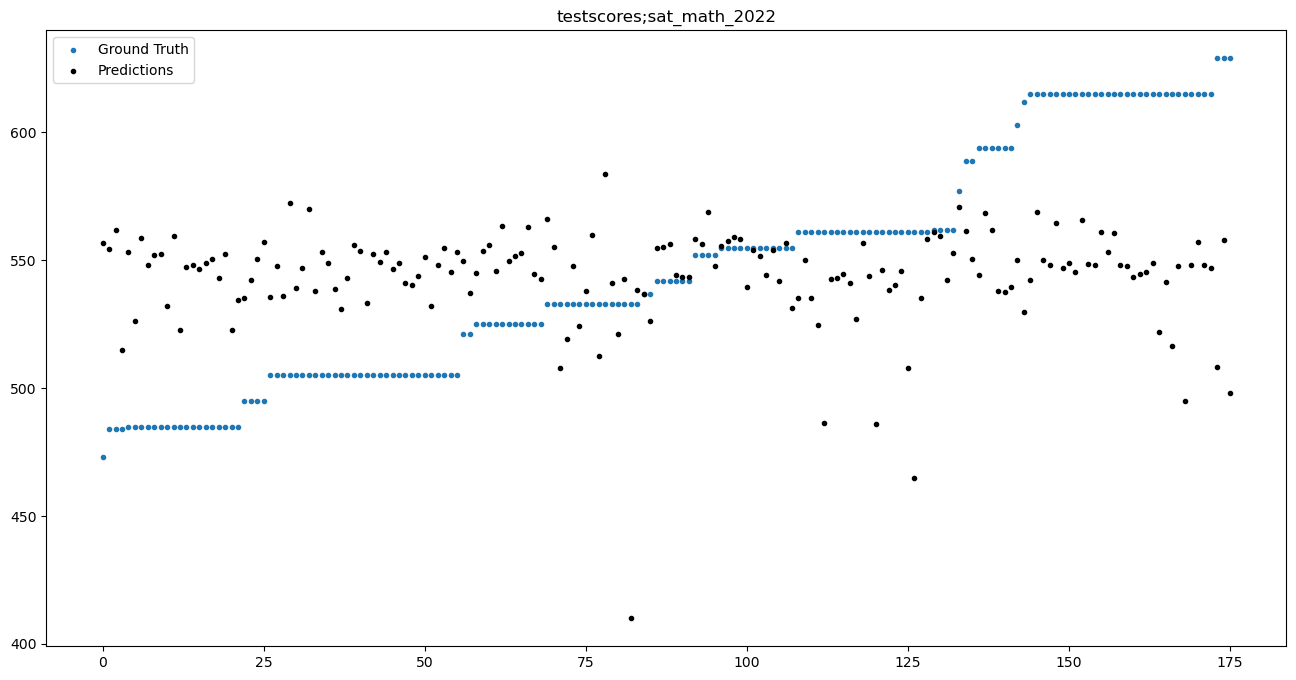

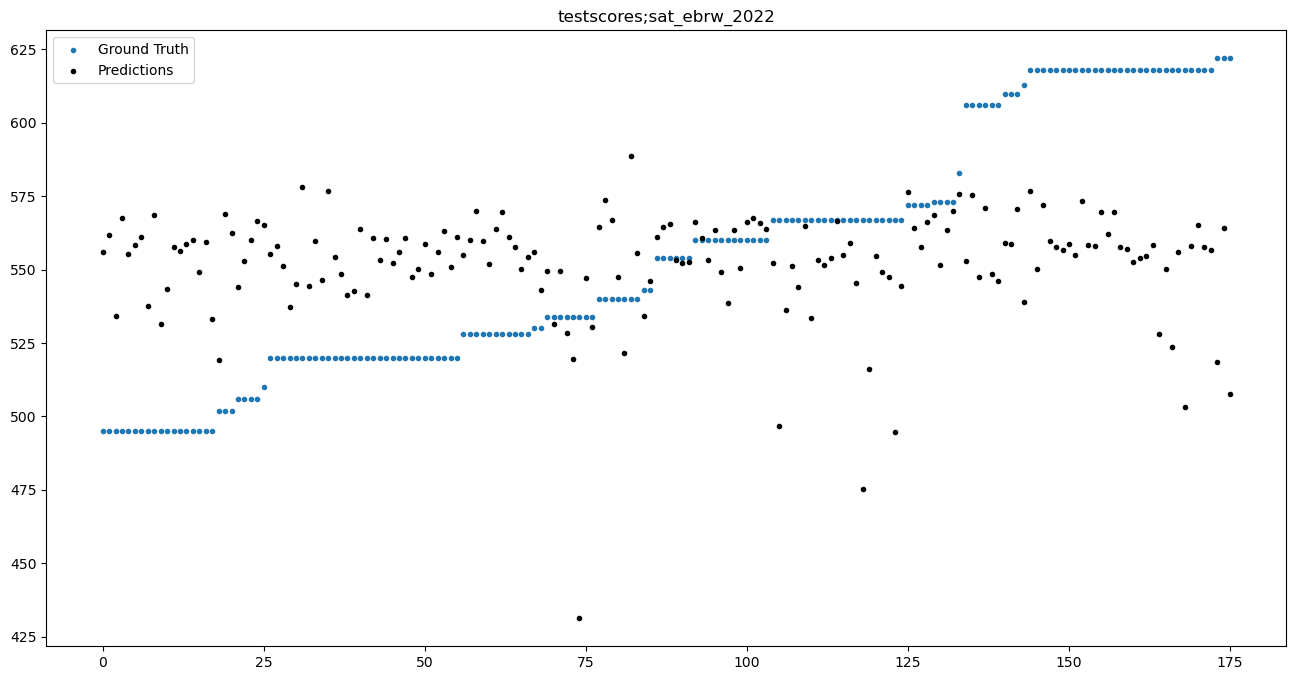

In [24]:
plot_residuals(five_fold_results)

<a id='model2d_model'></a>

## Model 2d: Predict SAT Score Change from Broadband (Best Baseline) Data

[(Back to top)](#models)

In [25]:
FEATURES = ['broadband;wired_over_25',
            'broadband;avg_mbps', 
            'broadband;frac_access', 
            'broadband;lowest_price']

TARGETS = ['testscores;sat_math_delta', 
           'testscores;sat_ebrw_delta']

five_fold_results = run_experiment(dataset, 
                                   FEATURES,
                                   TARGETS,
                                   Lasso(), 
                                   n_splits=5)


Dataset for testscores;sat_math_delta has 176 samples after filtering
Dataset for testscores;sat_ebrw_delta has 176 samples after filtering


<a id='model2d_results'></a>

### Model 2d Testing Results

[(Back to top)](#models)

In [26]:
print_results(five_fold_results, splits=['test'])

,testscores;sat_math_delta
test_r2,-0.1322
test_root_mean_squared_error,12.0890


testscores;sat_math_delta: 12.089


,testscores;sat_ebrw_delta
test_r2,-0.1937
test_root_mean_squared_error,12.5291


testscores;sat_ebrw_delta: 12.5291


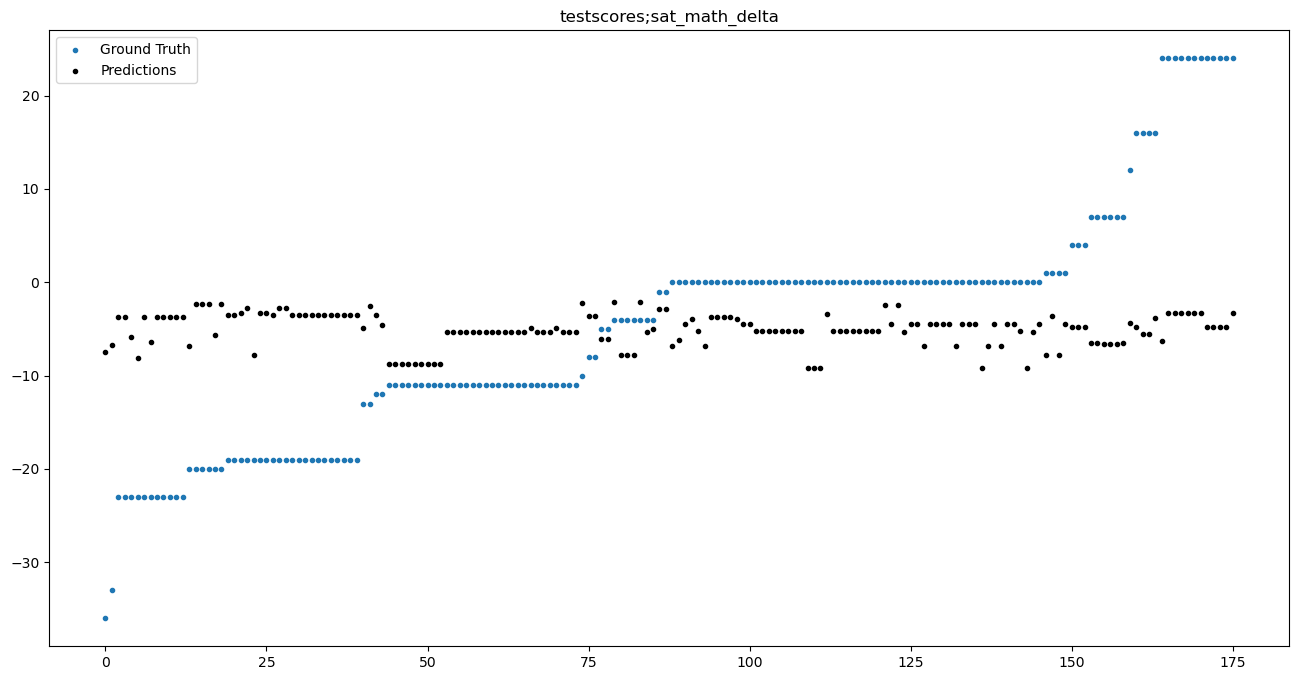

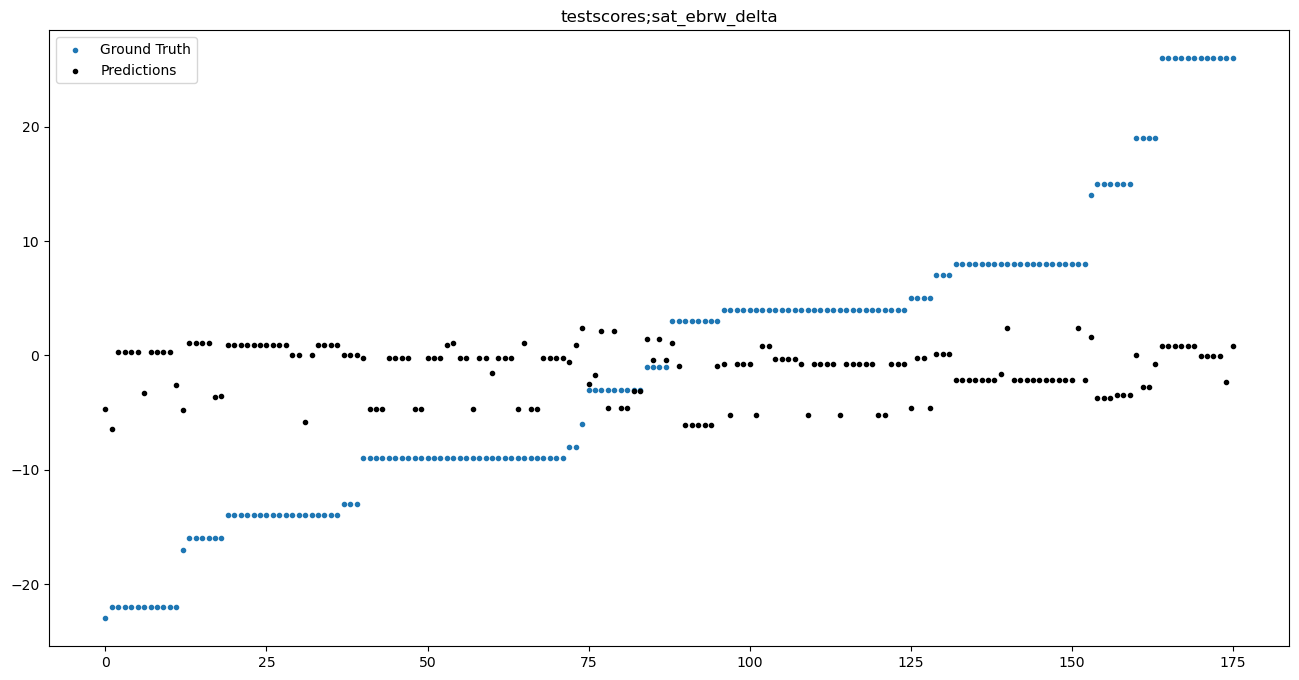

In [27]:
plot_residuals(five_fold_results)

-------------